In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('/users/anshumantewary/Downloads/Projects/Heart_attack_analysis/archive (1)/heart.csv')

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## About this dataset

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack



In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [5]:
df.shape

(303, 14)

In [6]:
df.info() #No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
from pandas.core.frame import Axes
#Lets present this in the form of a dataframe

def is_nullnumber(dataframe):
  is_null = []
  for i in dataframe.columns:
    x = dataframe[i].isnull().sum()
    is_null.append(x)
  return is_null

pd.DataFrame(is_nullnumber(df), index = df.columns, columns = [" Total Missing Values"] )

#Clean dataframe form


,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


<AxesSubplot:>

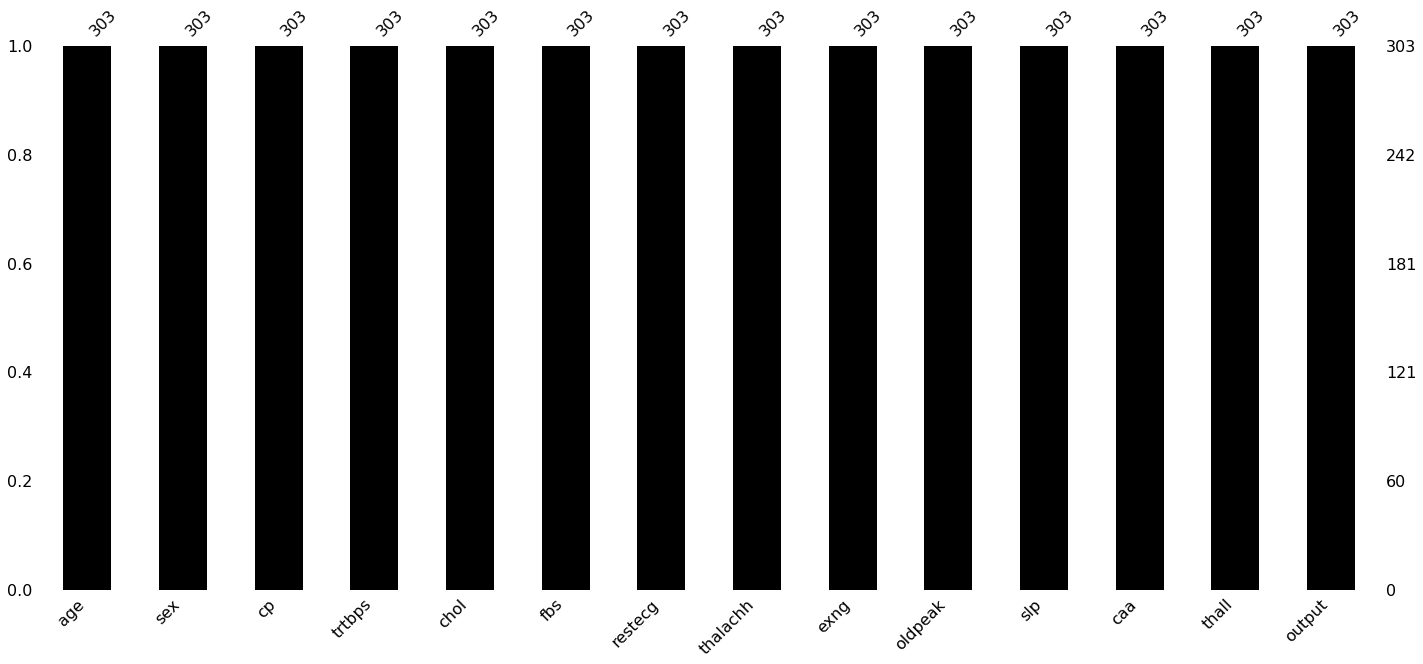

In [9]:
#Lets visualize the missing values

import missingno
missingno.bar(df, color = 'black')

In [10]:
#Lets examine the unique values

df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
def unq_values(dataframe):
  unq = []
  for i in dataframe.columns:
    x = dataframe[i].value_counts().count()
    unq.append(x)
  return unq

unq_df = pd.DataFrame(unq_values(df), index = df.columns, columns = ["Total unique values" ])

unq_df

,Total unique values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [12]:
#Lets say that all the variables which have a a count of total unique values <= 5, are categorical
#Or we want them to be categorical in nature for better understanding
#Lets separate the variables in two lists, numeric and categorical

categoric_var = unq_df[ unq_df['Total unique values'] <= 5 ]
print("Categoric Variables",categoric_var.index)

numeric_var = unq_df[ unq_df['Total unique values'] > 5  ]
print( "Numeric Variables",  numeric_var.index ) 

Categoric Variables Index(['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output'], dtype='object')
Numeric Variables Index(['age', 'trtbps', 'chol', 'thalachh', 'oldpeak'], dtype='object')


In [13]:
df[numeric_var.index].describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [14]:
#Lets check the distribution of the age variable, since we are seeing that 50% of the age lies <= 55, assuming the distribution is linear

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

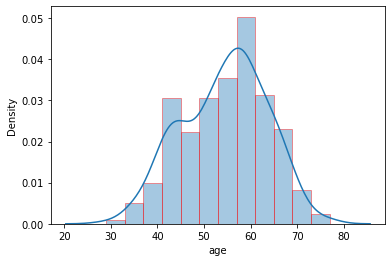

In [15]:
sns.distplot(df['age'], hist_kws = dict(linewidth = 1, edgecolor = 'r')) #Avg age is 54~55

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trtbps', ylabel='Density'>

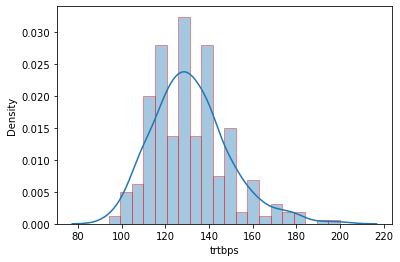

In [16]:
sns.distplot(df['trtbps'], bins = 20, hist_kws = dict(linewidth = 1, edgecolor = 'r')) #Avg blood pressure us ~ 120 - 130

In [17]:
#we want the data to be normally distributed, coz they are the most suitable for ML algorithms

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chol', ylabel='Density'>

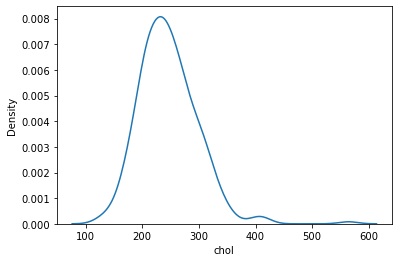

In [18]:
sns.distplot(df['chol'], hist = False) #Slight right skew

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


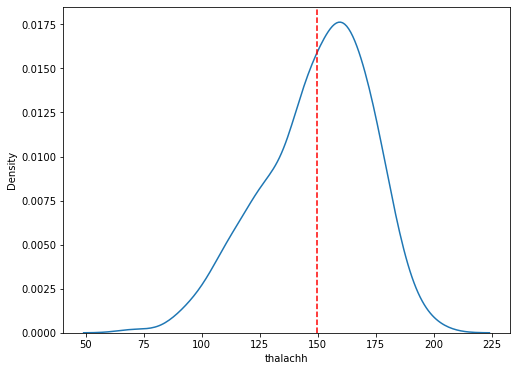

In [19]:
import matplotlib.pyplot as plt
x,y = plt.subplots(figsize = (8,6))
sns.distplot(df['thalachh'], hist = False, ax = y)
y.axvline(df['thalachh'].mean(), color = 'r', ls = '--')

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


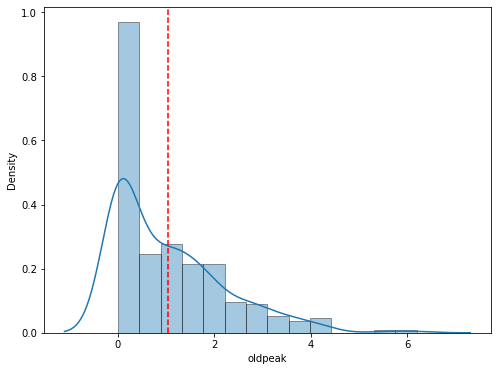

In [20]:
x,y = plt.subplots(figsize = (8,6))
sns.distplot(df['oldpeak'], hist_kws = dict(linewidth = 1, edgecolor = 'k'), ax = y)
y.axvline(df['oldpeak'].mean(), color = 'r', ls = '--')

#data is extremely right skewed

## Exploratory Data Analytics (Univariate analysis)

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


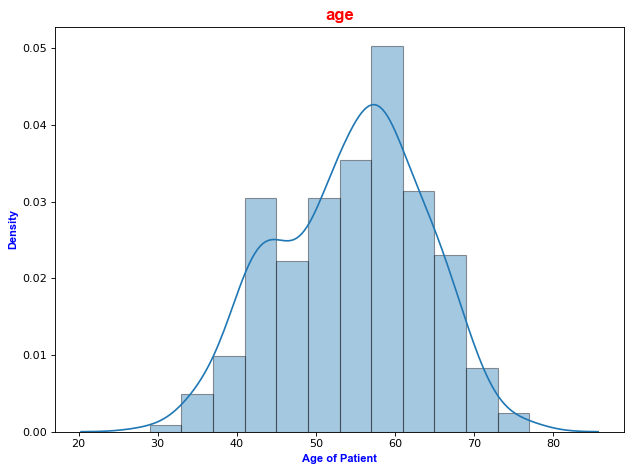

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


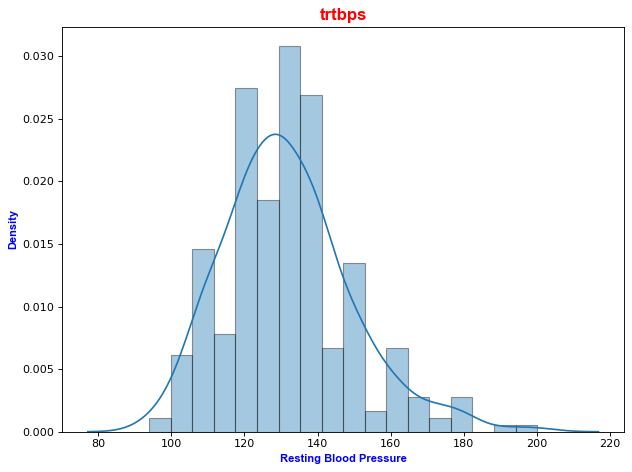

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


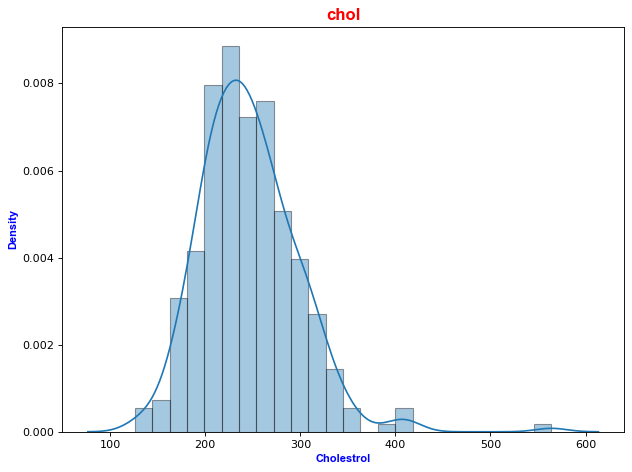

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


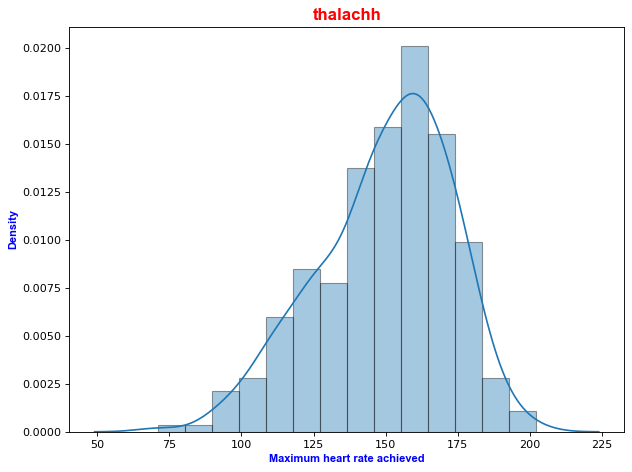

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


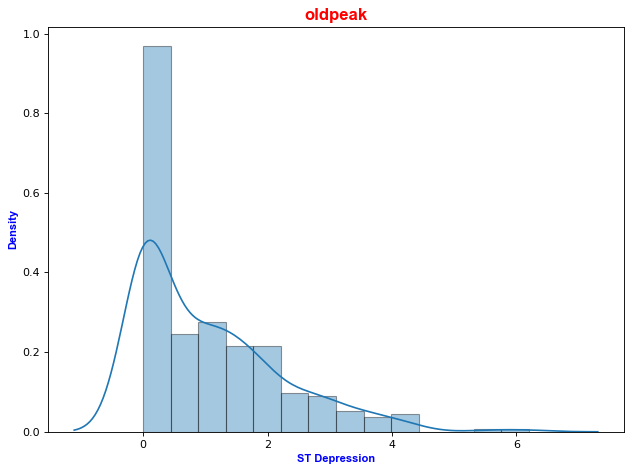

In [21]:
title_font = { "family":"arial", "color":"red", "weight":"bold", "size":15   }
axis_font = {   "family":"arial", "color":"blue", "weight":"bold", "size":10    }

numeric_axis_name = ["Age of Patient", "Resting Blood Pressure", "Cholestrol", "Maximum heart rate achieved", "ST Depression"]
list(zip(numeric_var.index, numeric_axis_name)) #Zipping values together to run in for loop

for i,z in list(zip(numeric_var.index, numeric_axis_name)): #i will store index values, whereas, z will store modified values
  plt.figure(figsize = (8,6), dpi = 80)
  sns.distplot(df[i], hist_kws = dict(linewidth = 1, edgecolor = 'k'))

  plt.title(i, fontdict = title_font)
  plt.xlabel(z, fontdict = axis_font) #We customized the x-label
  plt.ylabel("Density", fontdict = axis_font)
  plt.tight_layout()
  plt.show()



Analysis
1.   Age: There is a decrease in patients (against the trend) b/w ages  47-50,for reasons not yet known and no outliers
2.   Resting blood pressure: Values between 110 - 140, with some outliers
3. Cholestrol: Some outliers
4. Heart rate: Values before 80 are outliers
5. ST depression: Within this variable, the values range from 0-1.5 and after 2.5, we can say that they are outliers



## Using categorical variables

In [22]:
categoric_var

,Total unique values
sex,2
cp,4
fbs,2
restecg,3
exng,2
slp,3
caa,5
thall,4
output,2


In [23]:
list(df['cp'].value_counts())

[143, 87, 50, 23]

In [24]:
list(df['cp'].value_counts().index)

[0, 2, 1, 3]

In [25]:
categoric_axis_name = ["Gender", "Chest Pain type", "Fasting Blood Sugar", "Resting ECG results", "Exercise induce angina", "Slope of ST Segment", "Number of major vessels", "Thal", "Target"   ]

In [26]:
list(zip(categoric_var.index, categoric_axis_name))

[('sex', 'Gender'),
 ('cp', 'Chest Pain type'),
 ('fbs', 'Fasting Blood Sugar'),
 ('restecg', 'Resting ECG results'),
 ('exng', 'Exercise induce angina'),
 ('slp', 'Slope of ST Segment'),
 ('caa', 'Number of major vessels'),
 ('thall', 'Thal'),
 ('output', 'Target')]

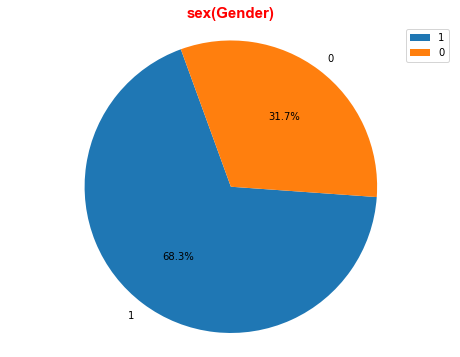

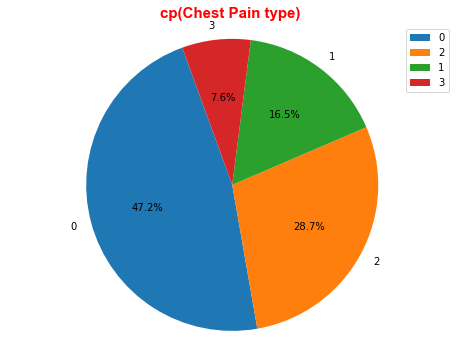

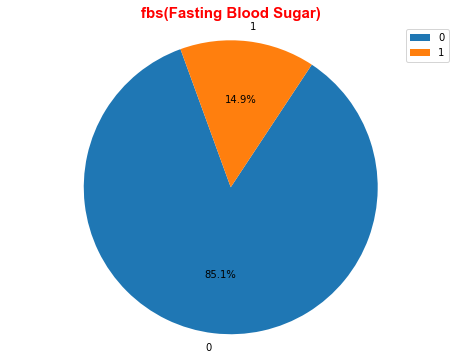

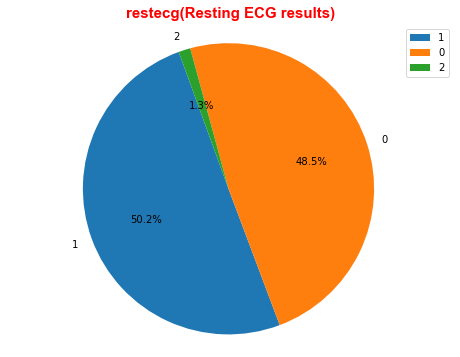

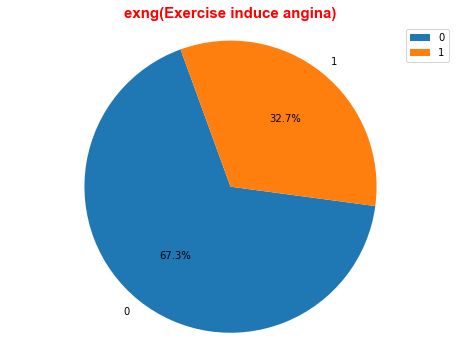

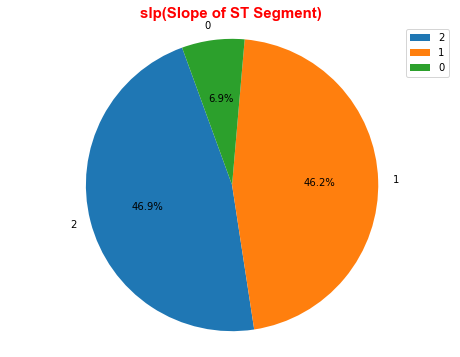

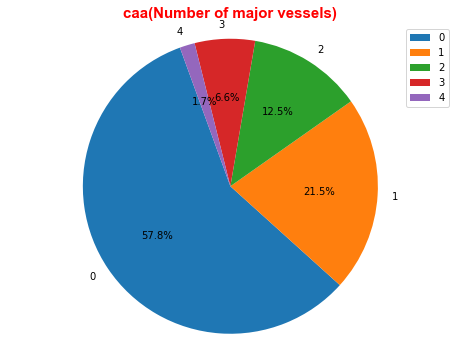

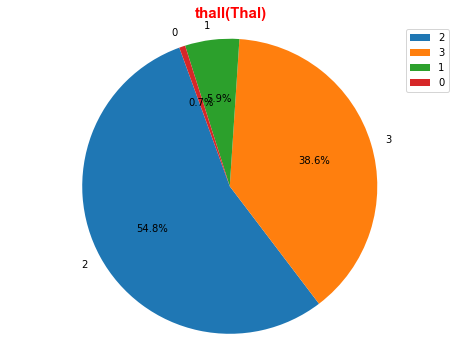

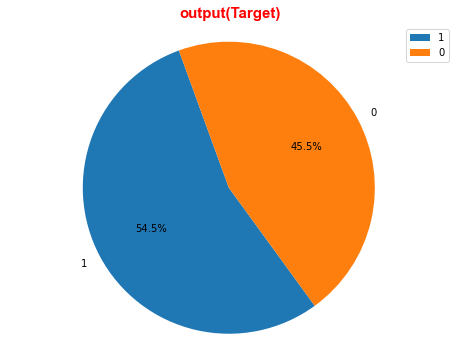

In [27]:
title_font = { "family":"arial", "color":"red", "weight":"bold", "size":15   }
axis_font = {   "family":"arial", "color":"blue", "weight":"bold", "size":10    }

for i,z in list(zip(categoric_var.index, categoric_axis_name)):
  fig, ax = plt.subplots(figsize = (8,6))
  
  observation_values = list(df[i].value_counts().index)
  total_number_obs = list(df[i].value_counts())

  ax.pie(total_number_obs, labels = observation_values, autopct = '%1.1f%%', startangle = 110, labeldistance = 1.1)
  ax.axis("equal")

  plt.title((i+ "(" + z + ")"), fontdict = title_font)
  plt.legend()
  plt.show()



In [28]:
#Considering the dataset and explanation, we have found that there is missing data in thal column, which should have 3 results but the data shows we have 4
df[df['thall']==0]


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [29]:
df['thall'] = df["thall" ].replace(0, np.nan)

In [30]:
df.loc[[48, 281], :]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
48,53,0,2,128,216,0,0,115,0,0.0,2,0,NaN,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,NaN,0


In [31]:
#Lets check if this reflects on the for loop we made to identify missing values
def is_nullnumber(dataframe):
  is_null = []
  for i in dataframe.columns:
    x = dataframe[i].isnull().sum()
    is_null.append(x)
  return is_null

pd.DataFrame(is_nullnumber(df), index = df.columns, columns = [" Total Missing Values"] )

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [32]:
#Lets fill the nan values with the most occured value
#As per the analys above, "thall" has most occurence of 2, approx 55%
#Replacing the same in the table

df['thall'].fillna(2, inplace = True)
df.loc[[48, 281], :]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2.0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2.0,0


In [33]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3.0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3.0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3.0,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3.0,0


In [34]:
#thall has all values in float type, lets convert them to integer so as to get results in visualizing them
df [ 'thall']=pd.to_numeric(df['thall'], downcast = 'integer')

df


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [35]:
df['thall'].value_counts()

#Job done

2    168
3    117
1     18
Name: thall, dtype: int64

## Exploratory Data Analytics (Bivariate analysis)

In [36]:
#Currently our numeric variable does not have the target variable (output)
#We need the target variable to compare the numeric types with the target variable
#Lets create the target variable as a dataframe and then append it to the numeric_variable

In [37]:
num_target = pd.concat([numeric_var, (pd.DataFrame([df['output'].value_counts().count()], index=["output"], columns = ['Total unique values']))])

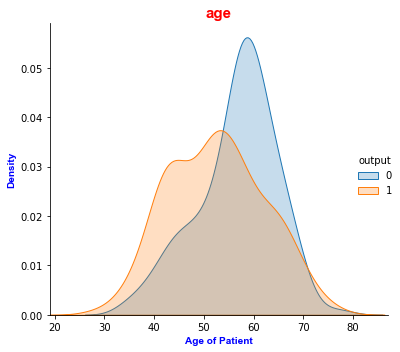

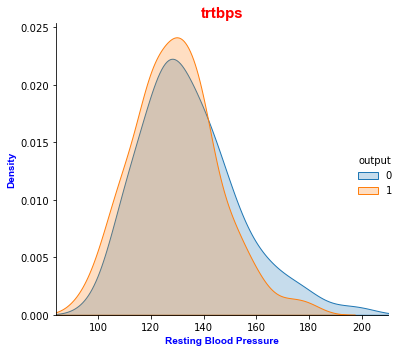

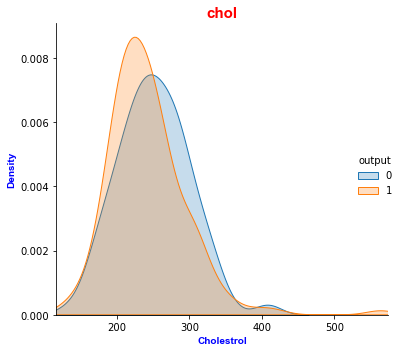

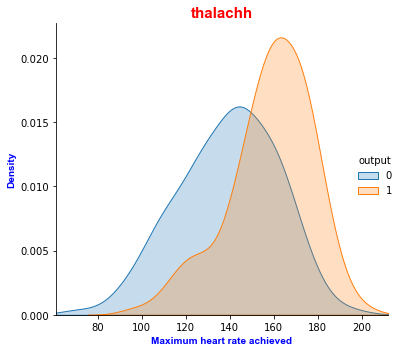

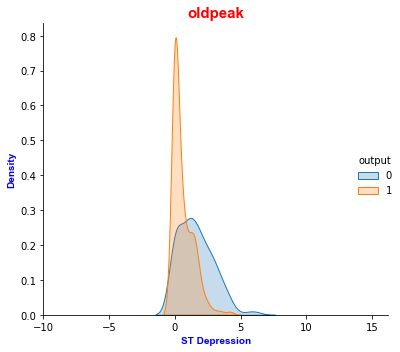

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


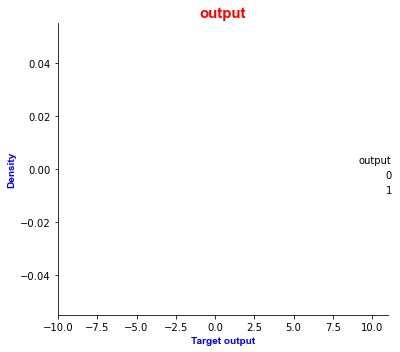

In [38]:
#Lets explore the relationship of each column with the "target" column\
#With Numeric variables


title_font = { "family":"arial", "color":"red", "weight":"bold", "size":15   }
axis_font = {   "family":"arial", "color":"blue", "weight":"bold", "size":10    }

numeric_axis_name = ["Age of Patient", "Resting Blood Pressure", "Cholestrol", "Maximum heart rate achieved", "ST Depression", "Target output"]
list(zip(num_target.index, numeric_axis_name)) #Zipping values together to run in for loop

for i,z in list(zip(num_target.index, numeric_axis_name)): #i will store index values, whereas, z will store modified values
  
  graph = sns.FacetGrid(df[num_target.index], hue = "output", height=5, aspect=1,  xlim = ((df[i].min()-10), (df[i].max()+10))) #We are extending the x-axis by +- 10 on both sides based on the min and max value
  graph.map (sns.kdeplot, i, shade = True)
  graph.add_legend()
  
  plt.title(i, fontdict = title_font)
  plt.xlabel(z, fontdict = axis_font) #We customized the x-label
  plt.ylabel("Density", fontdict = axis_font)
  plt.tight_layout()
  plt.show()

<AxesSubplot:>

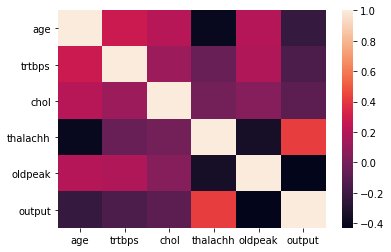

In [39]:
sns.heatmap(df[num_target.index].corr())

In [40]:
df[num_target.index].corr().iloc[:, [-1]] #No such correlation #I want the output in the form of a dataframe, hence the square brackets

,output
age,-0.225439
trtbps,-0.144931
chol,-0.085239
thalachh,0.421741
oldpeak,-0.430696
output,1.000000


## Categorical variables - target variable analysis with count plot

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


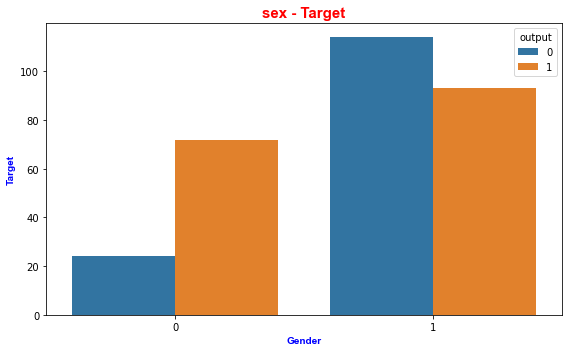

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


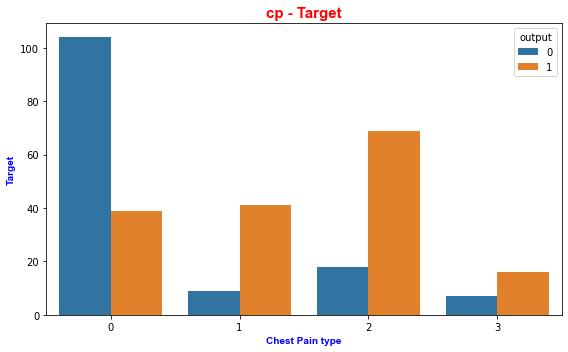

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


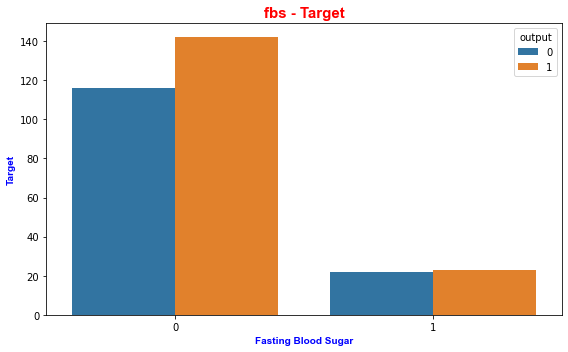

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


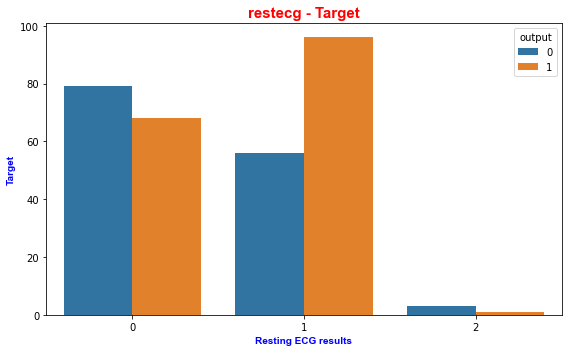

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


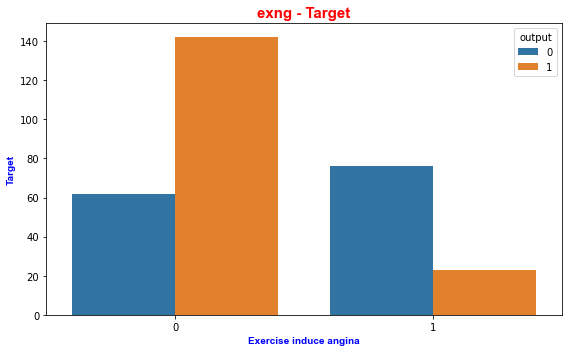

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


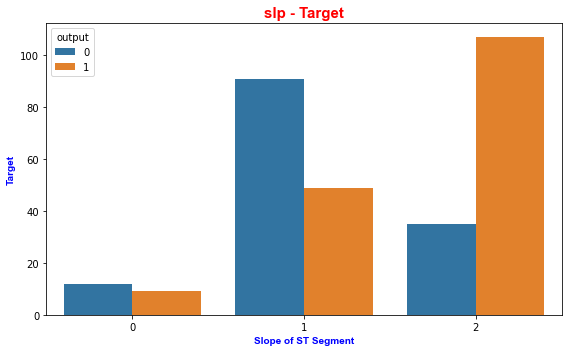

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


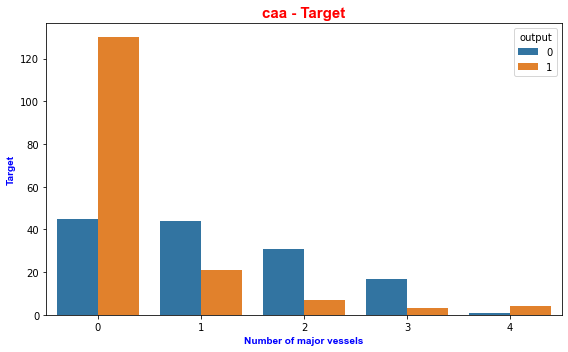

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


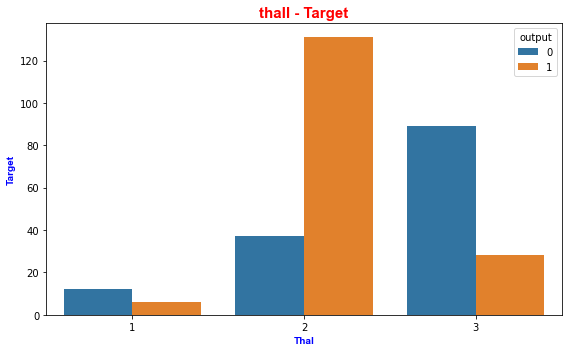

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


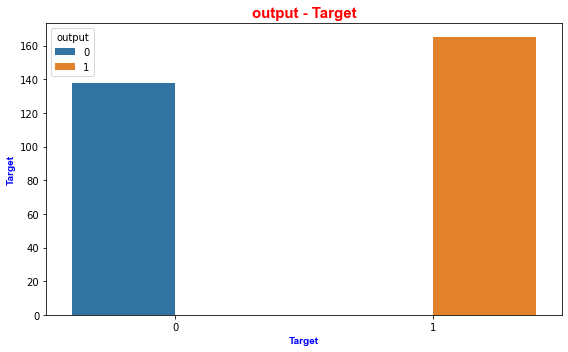

In [41]:
title_font = { "family":"arial", "color":"red", "weight":"bold", "size":15   }
axis_font = {   "family":"arial", "color":"blue", "weight":"bold", "size":10    }

list(zip(categoric_var.index, categoric_axis_name)) #Zipping values together to run in for loop

for i,z in list(zip(categoric_var.index, categoric_axis_name)): #i will store index values, whereas, z will store modified values
  plt.figure(figsize = (8,5))
  graph = sns.countplot(i, data = df[categoric_var.index], hue = "output") 
  plt.title(i + " - Target", fontdict = title_font)
  plt.xlabel(z, fontdict = axis_font) #We customized the x-label
  plt.ylabel("Target", fontdict = axis_font)
  plt.tight_layout()
  plt.show()

#Analysis of the output
1. On patients with sex = 0, i.e woman, risk of heart attack is half of those of men (1)
2. CP is the type of pain: probability of heart attack is almost none for 0 but 3x times higher on other cases
3. Fasting blood sugar, patients with fasting blood sugar higher than 120 are more susceptible to heart attacks
4. Rest ECG of value 1: Probability of having a HEART attack is 2x whereas is different in other cases
5. exang: Exercise induced angina: PAIN DUE TO EXERCISE, does not affect heart attack, as showed by graph with value 1
6. Slope: Patients with slope variable of 2 are 3 times more riskier of having a heart attack
7. CAA: Patients with a CAA value of 0 have a highers chance of having a heart attack than the other patients
8. thall: For thall: 2, we find that the value that draws our attention is the value 2, we can say that for other values that the incidence is reversed
9. Patients of having a risk of heart attack are more.


In [42]:
df[categoric_var.index].corr().iloc[:, [-1]] #No such correlation #I want the output in the form of a dataframe, hence the square brackets

,output
sex,-0.280937
cp,0.433798
fbs,-0.028046
restecg,0.137230
exng,-0.436757
slp,0.345877
caa,-0.391724
thall,-0.363322
output,1.000000


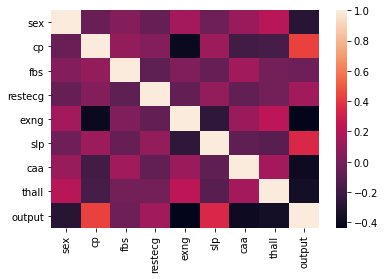

In [43]:
sns.heatmap(df[categoric_var.index].corr())
plt.show()

##Understanding relationship between numerical variables using pair plot

In [44]:
numeric_var.index

Index(['age', 'trtbps', 'chol', 'thalachh', 'oldpeak'], dtype='object')

In [45]:
df[numeric_var.index].head()

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


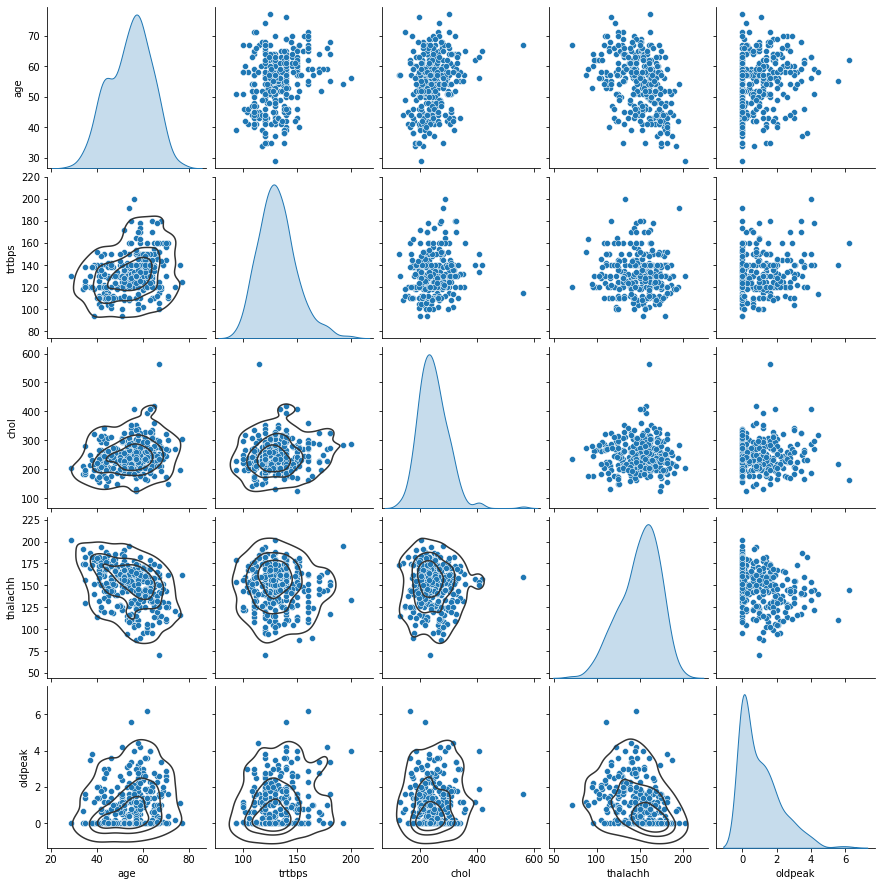

In [46]:

graph = sns.pairplot(df[numeric_var.index], diag_kind = "kde")
graph.map_lower(sns.kdeplot, levels = 4, color = ".2")
plt.show()


## Feature scaling with RobustScaler Method

We will now compare cross-comparison, i.e numerical with categorical mixed (and that is precisely why we need to scale the data, to nullify the difference in values)

Normalization

Standardization

Robust Scaler gives better results in data with outliers, because it removes the outliers and places them in the 1st and 3rd quartile of the data



In [47]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

In [48]:
scaled_data = robust_scaler.fit_transform(df[numeric_var.index])

In [49]:
scaled_data

array([[ 0.59259259,  0.75      , -0.11023622, -0.09230769,  0.9375    ],
       [-1.33333333,  0.        ,  0.15748031,  1.04615385,  1.6875    ],
       [-1.03703704,  0.        , -0.56692913,  0.58461538,  0.375     ],
       ...,
       [ 0.96296296,  0.7       , -0.74015748, -0.36923077,  1.625     ],
       [ 0.14814815,  0.        , -1.71653543, -1.16923077,  0.25      ],
       [ 0.14814815,  0.        , -0.06299213,  0.64615385, -0.5       ]])

In [50]:
df_scaled = pd.DataFrame(scaled_data, columns = numeric_var.index )

In [51]:
df_scaled

,age,trtbps,chol,thalachh,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250
...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750
299,-0.740741,-1.00,0.377953,-0.646154,0.2500
300,0.962963,0.70,-0.740157,-0.369231,1.6250
301,0.148148,0.00,-1.716535,-1.169231,0.2500


In [52]:
df_new = pd.concat([df_scaled, df.iloc[:,-1 ]], axis = 1  )

In [53]:
df_new

,age,trtbps,chol,thalachh,oldpeak,output
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,1
...,...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750,0
299,-0.740741,-1.00,0.377953,-0.646154,0.2500,0
300,0.962963,0.70,-0.740157,-0.369231,1.6250,0
301,0.148148,0.00,-1.716535,-1.169231,0.2500,0


## Melt function is used to create a pivot table here

In [54]:
melted_data = pd.melt(df_new, id_vars = "output", var_name = "variables", value_name = "value"   ) 

In [55]:
melted_data

,output,variables,value
0,1,age,0.592593
1,1,age,-1.333333
2,1,age,-1.037037
3,1,age,0.074074
4,1,age,0.148148
...,...,...,...
1510,0,oldpeak,-0.375000
1511,0,oldpeak,0.250000
1512,0,oldpeak,1.625000
1513,0,oldpeak,0.250000


/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 30.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


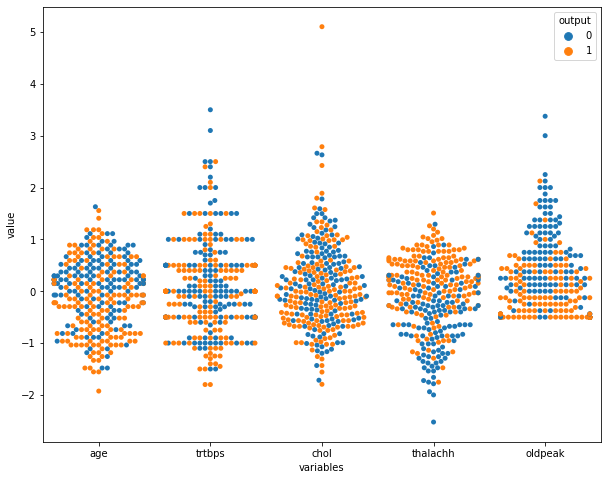

In [56]:
plt.figure(figsize= (10,8))
sns.swarmplot(x = "variables", y = "value", hue = "output", data = melted_data)
plt.show()

In [57]:
## Analyse all the variables together, except the target using swarmplot (Numerical + Categorical)

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 30.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


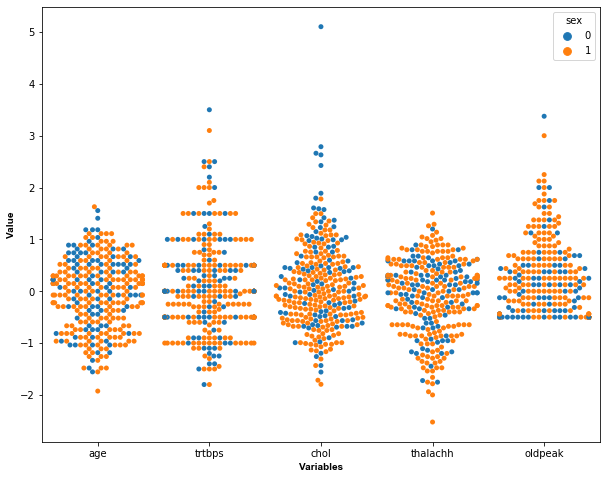

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 30.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


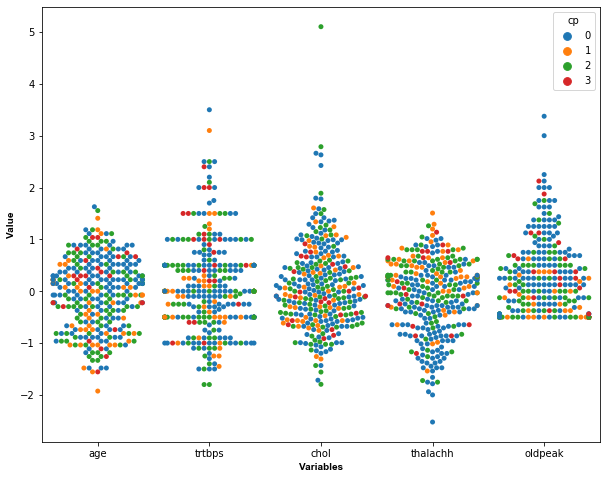

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 30.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


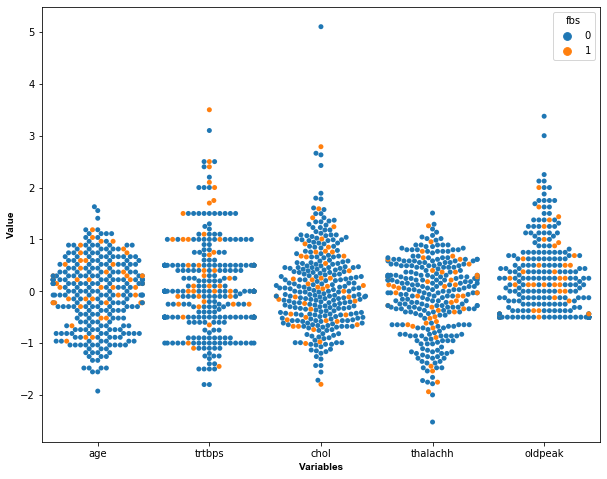

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 30.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


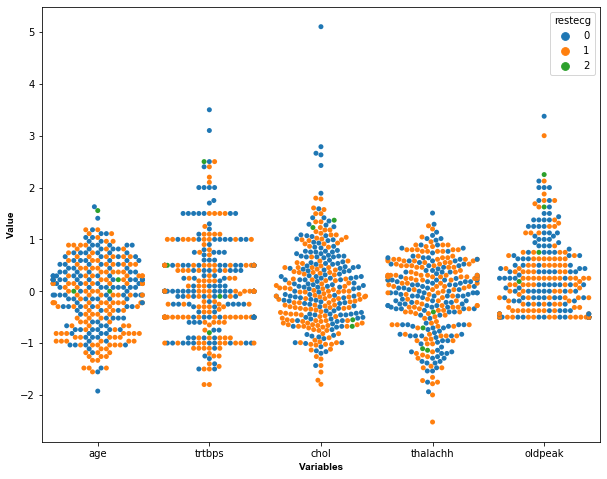

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 30.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


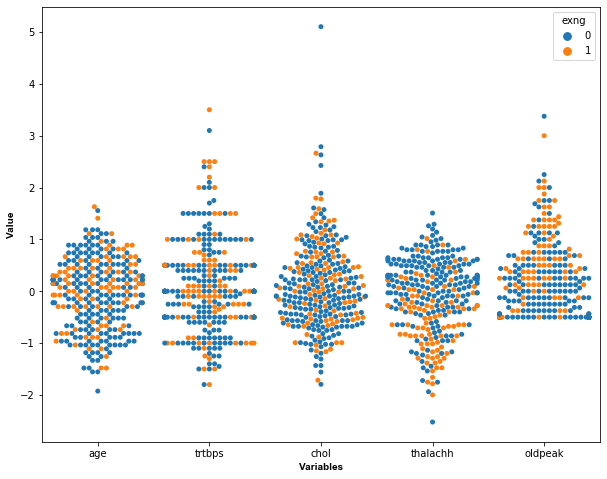

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 30.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


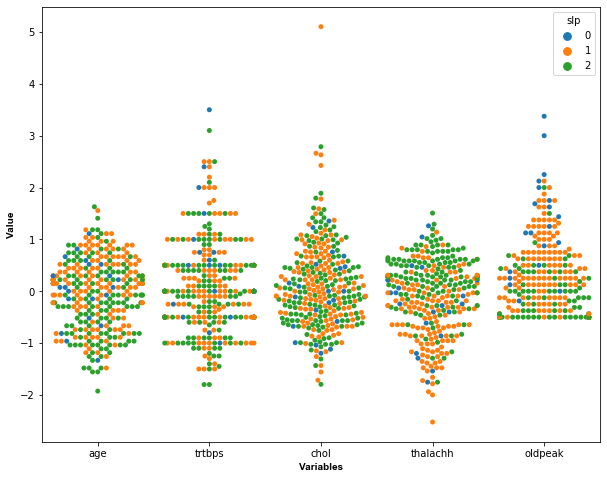

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 30.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


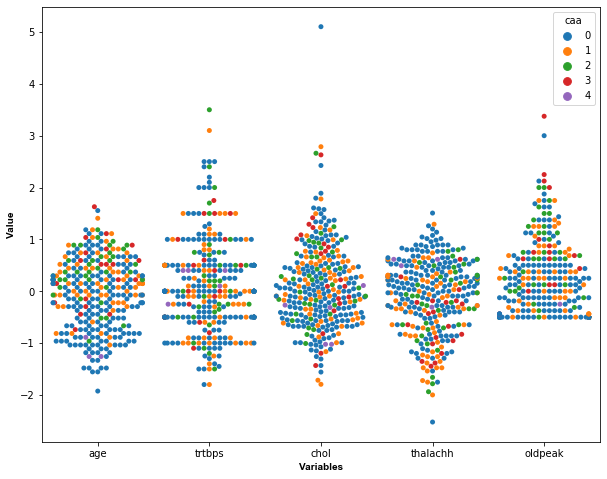

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 30.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


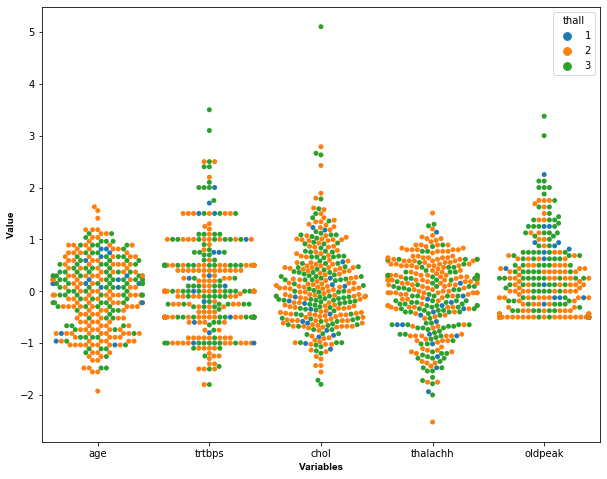

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 30.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


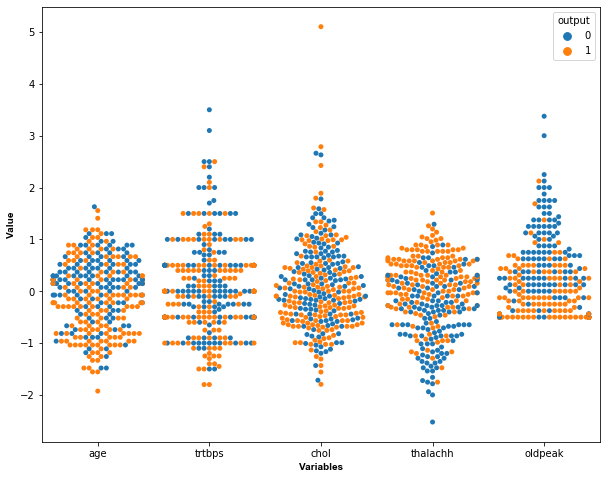

In [58]:
axis_font = {   "family":"arial", "color":"black", "weight":"bold", "size":10    }

for i in df[categoric_var.index]:
  df_new = pd.concat([df_scaled, df.loc[:,i ]], axis = 1  )
  melted_data = pd.melt(df_new, id_vars = i, var_name = "variables", value_name = "value"   ) 
  plt.figure(figsize= (10,8))
  sns.swarmplot(x = "variables", y = "value", hue = i, data = melted_data)
  plt.xlabel('Variables', fontdict = axis_font)
  plt.ylabel("Value", fontdict = axis_font)
  plt.show()

## Analysis of the variables using box-plot

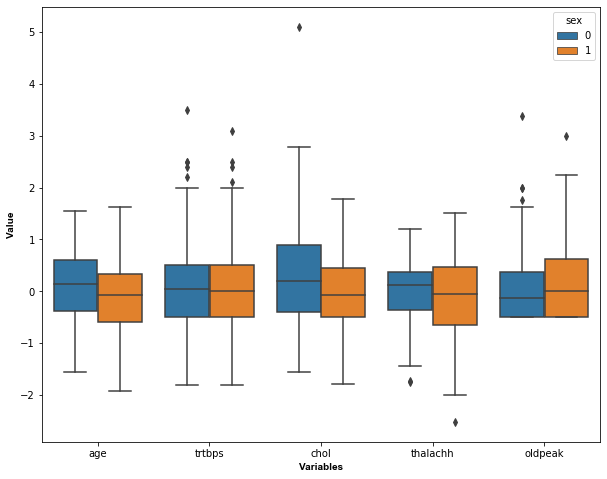

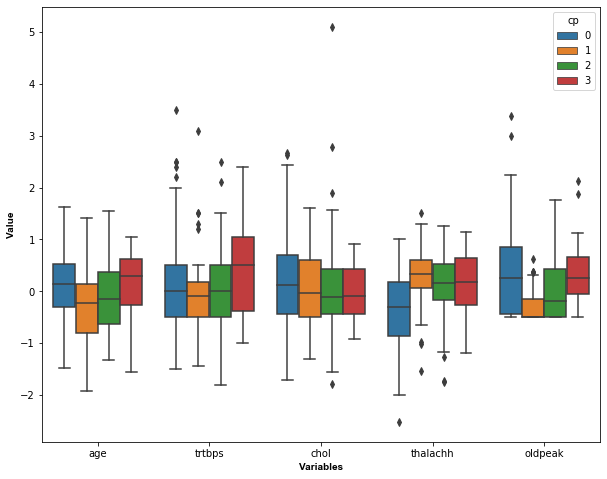

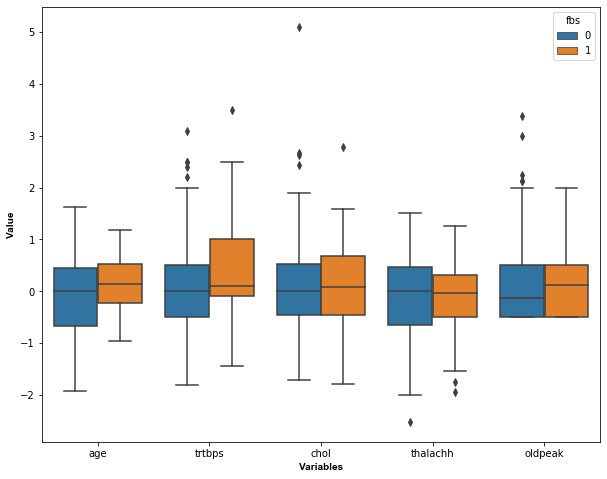

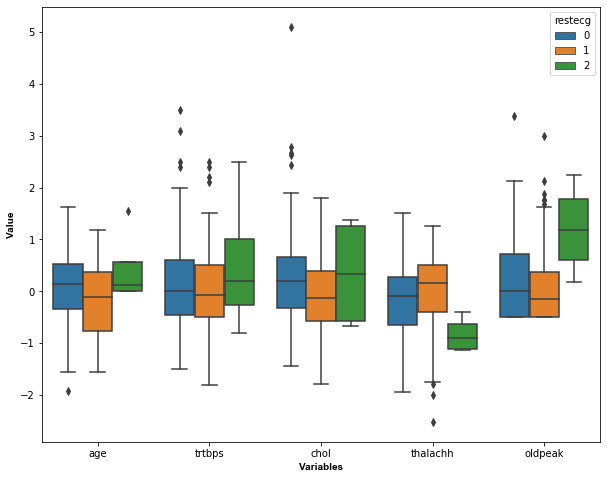

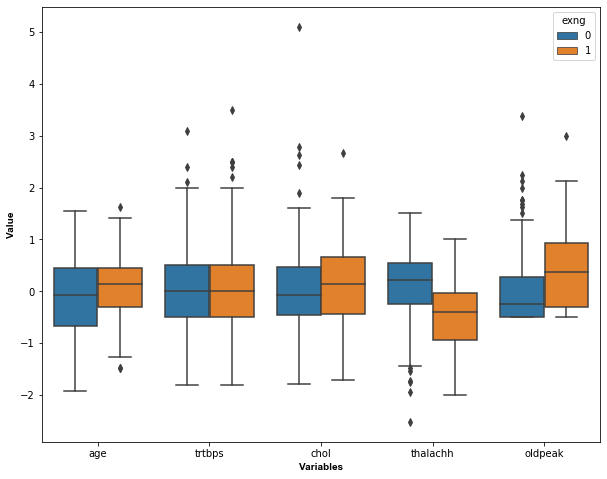

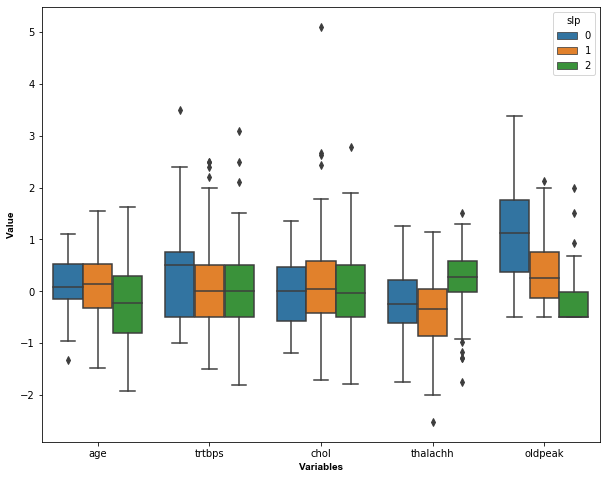

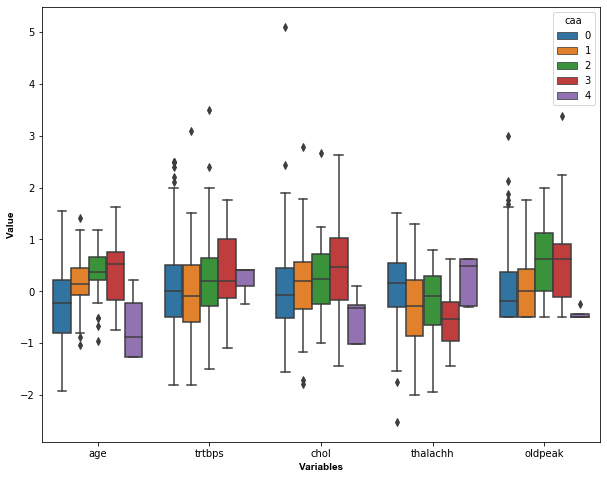

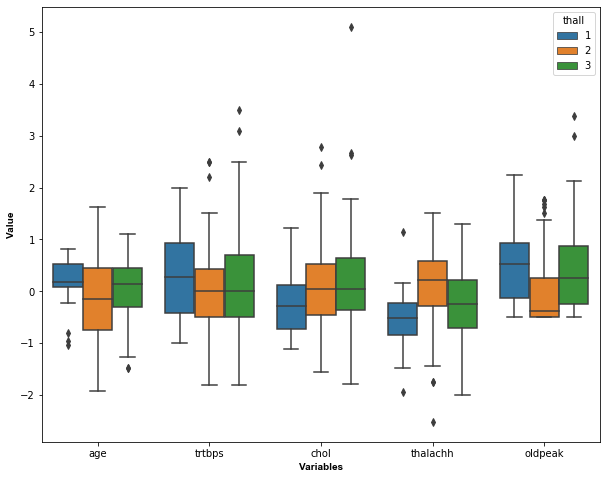

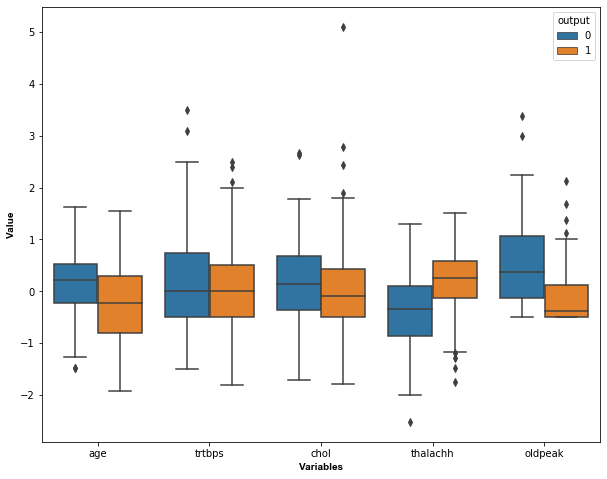

In [59]:
axis_font = {   "family":"arial", "color":"black", "weight":"bold", "size":10    }

for i in df[categoric_var.index]:
  df_new = pd.concat([df_scaled, df.loc[:,i ]], axis = 1  )
  melted_data = pd.melt(df_new, id_vars = i, var_name = "variables", value_name = "value"   ) 
  plt.figure(figsize= (10,8))
  sns.boxplot(x = "variables", y = "value", hue = i, data = melted_data)
  plt.xlabel('Variables', fontdict = axis_font)
  plt.ylabel("Value", fontdict = axis_font)
  plt.show()

## Heatmap analysis

In [60]:
df_scaled

,age,trtbps,chol,thalachh,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250
...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750
299,-0.740741,-1.00,0.377953,-0.646154,0.2500
300,0.962963,0.70,-0.740157,-0.369231,1.6250
301,0.148148,0.00,-1.716535,-1.169231,0.2500


In [61]:
df_new2= pd.concat([df_scaled, df[categoric_var.index]], axis = 1 )

In [62]:
df_new2

,age,trtbps,chol,thalachh,oldpeak,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,3,1,0,0,0,0,1,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,2,0,1,0,0,0,2,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,1,0,0,0,2,0,2,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,1,0,1,0,2,0,2,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750,0,0,0,1,1,1,0,3,0
299,-0.740741,-1.00,0.377953,-0.646154,0.2500,1,3,0,1,0,1,0,3,0
300,0.962963,0.70,-0.740157,-0.369231,1.6250,1,0,1,1,0,1,2,3,0
301,0.148148,0.00,-1.716535,-1.169231,0.2500,1,0,0,1,1,1,1,3,0


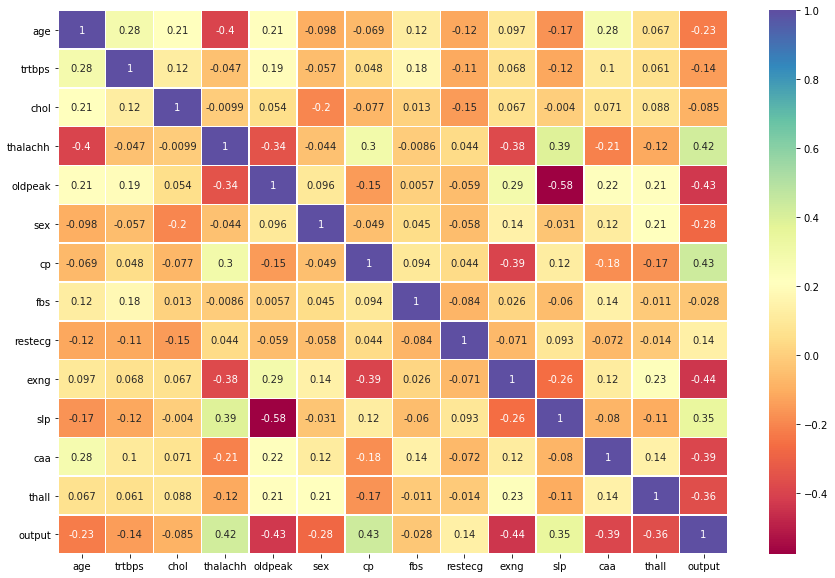

In [63]:
plt.figure(figsize = (15,10))
sns.heatmap(df_new2.corr(), cmap = "Spectral", annot = True, linewidths = 0.5)
plt.show()

## Preparation from modelling

We will remove the data with low correlation, as per the above analysis, so that the model performs better

In [64]:
df.drop(['chol', 'fbs', 'restecg'], axis = 1, inplace = True)

In [65]:
df.head()

,age,sex,cp,trtbps,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,150,0,2.3,0,0,1,1
1,37,1,2,130,187,0,3.5,0,0,2,1
2,41,0,1,130,172,0,1.4,2,0,2,1
3,56,1,1,120,178,0,0.8,2,0,2,1
4,57,0,0,120,163,1,0.6,2,0,2,1


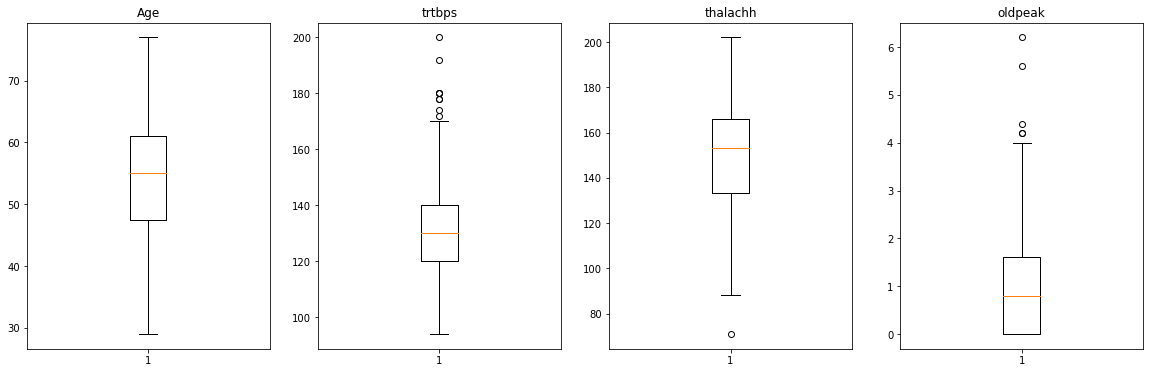

In [66]:
#Lets visualize the outliers

fig, (ax1, ax2, ax3, ax4) = plt.subplots( 1,4, figsize = (20,6) )#4 numeric variables to be displayed in 1 row and 4 columns
ax1.boxplot(df['age'])
ax1.set_title('Age')

ax2.boxplot(df['trtbps'])
ax2.set_title('trtbps')

ax3.boxplot(df['thalachh'])
ax3.set_title('thalachh')

ax4.boxplot(df['oldpeak'])
ax4.set_title('oldpeak')

plt.show()


In [67]:
#Now we have a clear idea about the outliers and their presence in the numerical data

In [68]:
#Dealing with outliers

In [69]:
# trtbps variable

from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

In [70]:
#For an almost normally distributed dataset, using z-score to get the outliers
#Lets position values, which are more than 3 st. dev from mean as outliers

z_scores_trtbps = zscore(df['trtbps'])
for threshold in range(1,4):
    print("Threshold Value: {}".format(threshold))
    print("Number of outliers: {}".format(len(np.where(z_scores_trtbps > threshold)[0]))) #this returns an array with the index and value, we need the index number and the count of all the values which are outliers
    print("----------------------------------------")
    

Threshold Value: 1
Number of outliers: 51
----------------------------------------
Threshold Value: 2
Number of outliers: 13
----------------------------------------
Threshold Value: 3
Number of outliers: 2
----------------------------------------


In [71]:
#In cases where sample sizes is small, we can set outliers after 2 standard dev., i.e threshold >2

df[z_scores_trtbps > 2][["trtbps"]] #These are the outliers

,trtbps
8,172
101,178
110,180
152,170
195,170
203,180
223,200
228,170
241,174
248,192


In [72]:
df[z_scores_trtbps > 2].trtbps.min()

170

In [73]:
df[df['trtbps']<170   ].trtbps.max()  #The max value closest to 170(less than it) is 165

165

In [74]:
winsorize_percentile_trtbps = (stats.percentileofscore(df['trtbps'],165))/100
print(winsorize_percentile_trtbps)

0.957095709570957


In [75]:
1-winsorize_percentile_trtbps

0.04290429042904298

In [76]:
trtbps_winsorize = winsorize(df.trtbps, (0, (1-winsorize_percentile_trtbps)))

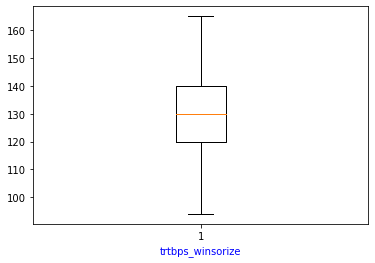

In [77]:
plt.boxplot(trtbps_winsorize)
plt.xlabel("trtbps_winsorize", c = "b")
plt.show()

In [78]:
df['trtbps_winsorize'] = trtbps_winsorize

In [79]:
df.head()

,age,sex,cp,trtbps,thalachh,exng,oldpeak,slp,caa,thall,output,trtbps_winsorize
0,63,1,3,145,150,0,2.3,0,0,1,1,145
1,37,1,2,130,187,0,3.5,0,0,2,1,130
2,41,0,1,130,172,0,1.4,2,0,2,1,130
3,56,1,1,120,178,0,0.8,2,0,2,1,120
4,57,0,0,120,163,1,0.6,2,0,2,1,120


In [82]:
#For cases which dont have a normal distribution, we can use the interquartile range statistic
#thalachh variable

def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5*diff)
    upper_v = q3 + (1.5*diff)
    return df[(df[var] < lower_v) | (df[var] > upper_v)]

    

In [83]:
thalachh_out = iqr(df, 'thalachh')

In [84]:
thalachh_out

,age,sex,cp,trtbps,thalachh,exng,oldpeak,slp,caa,thall,output,trtbps_winsorize
272,67,1,0,120,71,0,1.0,1,0,2,0,120


In [85]:
df.drop([272], axis = 0, inplace = True)

In [86]:
df['thalachh'][270:275] #removed

270    144
271    145
273    156
274    118
275    168
Name: thalachh, dtype: int64

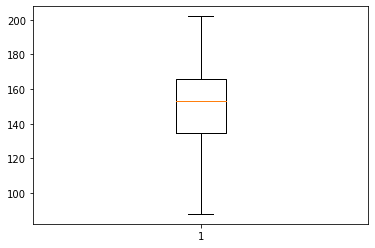

In [87]:
plt.boxplot(df['thalachh'])
plt.show()

In [88]:
#oldpeak variable

iqr(df, 'oldpeak')  #lets use winsorize

,age,sex,cp,trtbps,thalachh,exng,oldpeak,slp,caa,thall,output,trtbps_winsorize
101,59,1,3,178,145,0,4.2,0,0,3,1,165
204,62,0,0,160,145,0,6.2,0,3,3,0,160
221,55,1,0,140,111,1,5.6,0,0,3,0,140
250,51,1,0,140,122,1,4.2,1,3,3,0,140
291,58,1,0,114,140,0,4.4,0,3,1,0,114


In [89]:
df[ df['oldpeak'] < 4.2 ].oldpeak.max()

4.0

In [90]:
winsorize_percentile_oldpeak = (stats.percentileofscore(df['oldpeak'],4))/100

In [91]:
winsorize_percentile_oldpeak


0.9801324503311258

In [92]:
oldpeak_winsorize = winsorize(df.oldpeak, (0,(1 - winsorize_percentile_oldpeak)))

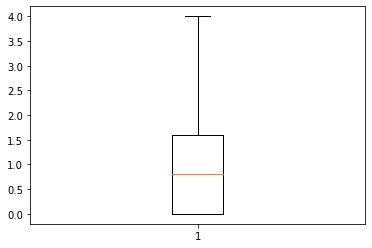

In [93]:
plt.boxplot(oldpeak_winsorize)
plt.show()

In [94]:
df['oldpeak_winsorize'] = oldpeak_winsorize

In [95]:
df.head()

,age,sex,cp,trtbps,thalachh,exng,oldpeak,slp,caa,thall,output,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,145,150,0,2.3,0,0,1,1,145,2.3
1,37,1,2,130,187,0,3.5,0,0,2,1,130,3.5
2,41,0,1,130,172,0,1.4,2,0,2,1,130,1.4
3,56,1,1,120,178,0,0.8,2,0,2,1,120,0.8
4,57,0,0,120,163,1,0.6,2,0,2,1,120,0.6


In [96]:
df.drop(['trtbps', 'oldpeak'], axis = 1, inplace = True)

In [97]:
df.head()

,age,sex,cp,thalachh,exng,slp,caa,thall,output,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,150,0,0,0,1,1,145,2.3
1,37,1,2,187,0,0,0,2,1,130,3.5
2,41,0,1,172,0,2,0,2,1,130,1.4
3,56,1,1,178,0,2,0,2,1,120,0.8
4,57,0,0,163,1,2,0,2,1,120,0.6


# Determining distribution of Numeric Variables

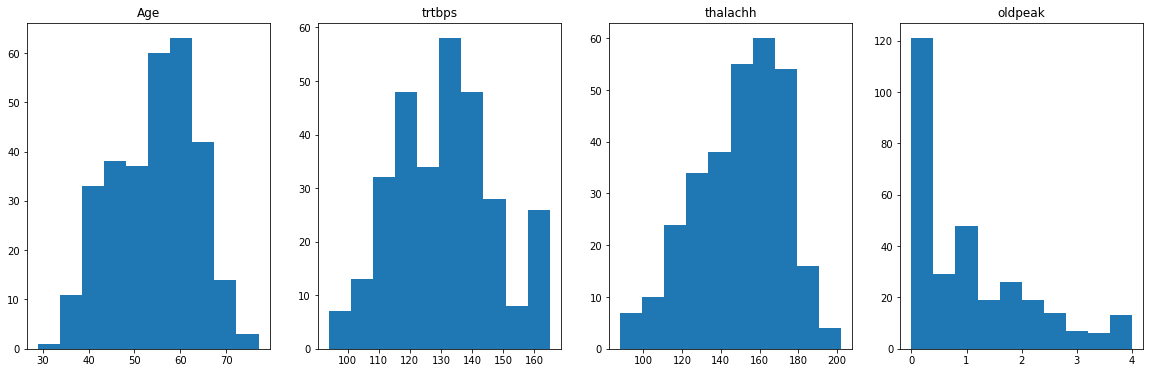

In [98]:
#Using histplot

fig, (ax1, ax2, ax3, ax4) = plt.subplots( 1,4, figsize = (20,6) )#4 numeric variables to be displayed in 1 row and 4 columns
ax1.hist(df['age'])
ax1.set_title('Age')

ax2.hist(df['trtbps_winsorize'])
ax2.set_title('trtbps')

ax3.hist(df['thalachh'])
ax3.set_title('thalachh')

ax4.hist(df['oldpeak_winsorize'])
ax4.set_title('oldpeak')

plt.show()

In [99]:
#oldpeak is right skewed

df[['age', 'trtbps_winsorize', 'thalachh', 'oldpeak_winsorize']].agg(['skew']).transpose()

#values between -0.5 to -1.0 and 0.5 - 1.0 almost show minor skew
#values greater than -1.0 or 1, will have high skew,
#which is shown by the last variable

,skew
age,-0.199209
trtbps_winsorize,0.251969
thalachh,-0.461611
oldpeak_winsorize,0.996036


In [100]:
#lets try to make the last variable look like normal distribution, for the machine learning model
#applying the transformation operation

#take log of all values in the variable or sq.rt of all variables

df['oldpeak_winsorize_log']= np.log(df['oldpeak_winsorize'])
df['oldpeak_winsorize_sqrt'] = np.sqrt(df['oldpeak_winsorize'])

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [101]:
df.head()

,age,sex,cp,thalachh,exng,slp,caa,thall,output,trtbps_winsorize,oldpeak_winsorize,oldpeak_winsorize_log,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,2.3,0.832909,1.516575
1,37,1,2,187,0,0,0,2,1,130,3.5,1.252763,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.4,0.336472,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.8,-0.223144,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.6,-0.510826,0.774597


In [102]:
df[['age', 'trtbps_winsorize', 'thalachh', 'oldpeak_winsorize', 'oldpeak_winsorize_log', 'oldpeak_winsorize_sqrt']].agg(['skew']).transpose()



,skew
age,-0.199209
trtbps_winsorize,0.251969
thalachh,-0.461611
oldpeak_winsorize,0.996036
oldpeak_winsorize_log,NaN
oldpeak_winsorize_sqrt,0.108926


In [103]:
df.drop(['oldpeak_winsorize', 'oldpeak_winsorize_log'   ], axis = 1, inplace = True)

In [104]:
df.head()

,age,sex,cp,thalachh,exng,slp,caa,thall,output,trtbps_winsorize,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,1.516575
1,37,1,2,187,0,0,0,2,1,130,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.774597


## One Hot Encoding for the categorical variables

In [105]:
categoric_var.index

Index(['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output'], dtype='object')

In [106]:
df_copy = df.copy()  #Creating a copy of our master dataset

In [107]:
df_copy.head()

,age,sex,cp,thalachh,exng,slp,caa,thall,output,trtbps_winsorize,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,1.516575
1,37,1,2,187,0,0,0,2,1,130,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.774597


In [108]:
categoric_variables = ['sex', 'cp', 'exng', 'slp', 'caa', 'thall']
categoric_variables

['sex', 'cp', 'exng', 'slp', 'caa', 'thall']

In [109]:
df_copy.drop(['output'], axis = 1, inplace = True)

In [110]:
df_copy.head()

,age,sex,cp,thalachh,exng,slp,caa,thall,trtbps_winsorize,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,145,1.516575
1,37,1,2,187,0,0,0,2,130,1.870829
2,41,0,1,172,0,2,0,2,130,1.183216
3,56,1,1,178,0,2,0,2,120,0.894427
4,57,0,0,163,1,2,0,2,120,0.774597


In [111]:
df_copy = pd.get_dummies(df_copy, columns = categoric_variables, drop_first = True     )

In [112]:
df_copy.head()

,age,thalachh,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_2,thall_3
0,63,150,145,1.516575,1,0,0,1,0,0,0,0,0,0,0,0,0
1,37,187,130,1.870829,1,0,1,0,0,0,0,0,0,0,0,1,0
2,41,172,130,1.183216,0,1,0,0,0,0,1,0,0,0,0,1,0
3,56,178,120,0.894427,1,1,0,0,0,0,1,0,0,0,0,1,0
4,57,163,120,0.774597,0,0,0,0,1,0,1,0,0,0,0,1,0


In [113]:
df_copy['output'] = df['output']

In [114]:
df_copy.head()

,age,thalachh,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_2,thall_3,output
0,63,150,145,1.516575,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,37,187,130,1.870829,1,0,1,0,0,0,0,0,0,0,0,1,0,1
2,41,172,130,1.183216,0,1,0,0,0,0,1,0,0,0,0,1,0,1
3,56,178,120,0.894427,1,1,0,0,0,0,1,0,0,0,0,1,0,1
4,57,163,120,0.774597,0,0,0,0,1,0,1,0,0,0,0,1,0,1


In [115]:
#Scaling of numerical data

numeric_var1 = [ 'age', 'thalachh',  'trtbps_winsorize', 'oldpeak_winsorize_sqrt'   ]

In [116]:
robust_scaler = RobustScaler()

In [117]:
df_copy[numeric_var1] = robust_scaler.fit_transform(df_copy[numeric_var1])

In [118]:
df_copy.head()

,age,thalachh,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_2,thall_3,output
0,0.581818,-0.095238,0.75,0.491851,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,-1.309091,1.079365,0.00,0.771913,1,0,1,0,0,0,0,0,0,0,0,1,0,1
2,-1.018182,0.603175,0.00,0.228308,0,1,0,0,0,0,1,0,0,0,0,1,0,1
3,0.072727,0.793651,-0.50,0.000000,1,1,0,0,0,0,1,0,0,0,0,1,0,1
4,0.145455,0.317460,-0.50,-0.094734,0,0,0,0,1,0,1,0,0,0,0,1,0,1


In [119]:
#Separating the data in training and test set

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
x = df_copy.drop(['output'], axis =1)

In [122]:
y = df_copy['output']

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [124]:
x_train.head()

,age,thalachh,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_2,thall_3
236,0.218182,0.571429,-0.25,-0.707107,1,0,0,0,0,0,1,0,1,0,0,0,1
106,1.018182,-0.698413,1.50,-0.457107,1,0,0,1,0,1,0,1,0,0,0,1,0
10,-0.072727,0.222222,0.50,0.158919,1,0,0,0,0,0,1,0,0,0,0,1,0
153,0.800000,-0.031746,0.80,-0.707107,0,0,1,0,0,1,0,1,0,0,0,1,0
77,0.290909,0.349206,0.50,-0.707107,1,1,0,0,1,0,1,0,0,0,0,1,0


In [125]:
y_train.head()

236    0
106    1
10     1
153    1
77     1
Name: output, dtype: int64

In [126]:
print(f"x_train : {x_train.shape[0]}")
print(f"x_test : {x_test.shape[0]}")
print(f"y_train : {y_train.shape[0]}")
print(f"y_test : {y_test.shape[0]}")

x_train : 241
x_test : 61
y_train : 241
y_test : 61


## Logistic Regression 

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [128]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [129]:
y_pred = log_reg.predict(x_test)

In [130]:
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0])

In [131]:
#Lets check the accuracy of these values

accuracy = accuracy_score(y_test, y_pred)

In [132]:
print("Test Accuracy: {}".format(accuracy))

Test Accuracy: 0.9180327868852459


## But how reliable is this accuracy?

In [137]:
#Overfitting and underfitting

from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_reg, x_test, y_test, cv = 10 )
print("Cross validation score is :", scores.mean())

#Model accuracy is close to what we got earlier, which indicates that the model is not memorising data

Cross validation score is : 0.869047619047619


## PLotting ROC curve and get AUC

In [139]:
from sklearn.metrics import plot_roc_curve

#To plot TPR and FPR, recall and sensitivity

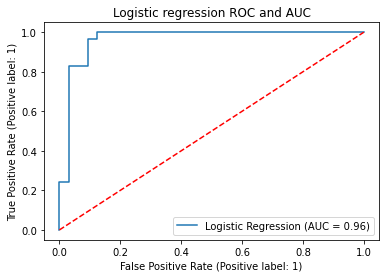

In [140]:
plot_roc_curve(log_reg, x_test, y_test, name = "Logistic Regression")
plt.title("Logistic regression ROC and AUC")
plt.plot([0,1], [0,1], "r--") #To show the red dashed line, 
plt.show()

## Hyperparameter Optimzation with GridSearchCV

In [141]:
from sklearn.model_selection import GridSearchCV

In [142]:
log_reg_new = LogisticRegression() #We will finetune the penalty and solver parameters
log_reg_new

LogisticRegression()

In [143]:
#Lets create a dictionary with the parameters and values, so that we can use the same in a grid search cv 

parameters = {"penalty" : ["l1", "l2"], 'solver': ['newtron-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

log_reg_grid = GridSearchCV(log_reg_new, param_grid=parameters)

In [144]:
log_reg_grid.fit(x_train, y_train)

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got newtron-cg.

  warnin

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['newtron-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [145]:
print("Best parameters :", log_reg_grid.best_params_)

Best parameters : {'penalty': 'l1', 'solver': 'liblinear'}


In [147]:
log_reg_new2 = LogisticRegression(penalty='l1', solver='liblinear')
log_reg_new2.fit(x_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [149]:
y_pred2 = log_reg_new2.predict(x_test)

In [150]:
print("Accuracy after hyper-parameter tuning is : {} ".format(accuracy_score(y_test, y_pred)))

Accuracy after hyper-parameter tuning is : 0.9180327868852459 


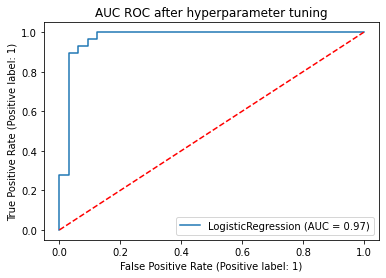

In [155]:
#Lets see the ROC and AUC

from sklearn.metrics import plot_roc_curve

plot_roc_curve(log_reg_new2, x_test, y_test)
plt.plot([0,1], [0,1], "r--")
plt.title("AUC ROC after hyperparameter tuning")
plt.show()


## Lets use decision tree classification

In [157]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(random_state = 5)
dec_tree

DecisionTreeClassifier(random_state=5)

In [158]:
dec_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=5)

In [159]:
y_pred3 = dec_tree.predict(x_test)

In [164]:
print("The accuracy score using decision tree is : {}" .format(accuracy_score(y_test, y_pred3)))

The accuracy score using decision tree is : 0.7704918032786885


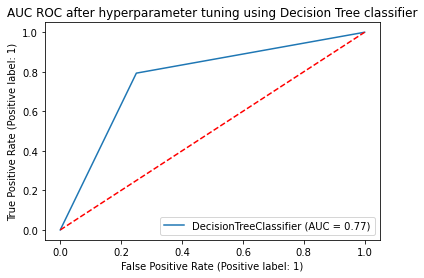

In [165]:
#Plot the ROC AUC curve 
plot_roc_curve(dec_tree, x_test, y_test)
plt.plot([0,1], [0,1], "r--")
plt.title("AUC ROC after hyperparameter tuning using Decision Tree classifier")
plt.show()

In [163]:
#Lets use the cross validation scores

from sklearn.model_selection import cross_val_score

scores_tree = cross_val_score(dec_tree, x_test, y_test, cv = 10 )
print("Cross validation score using decision tree :", scores_tree.mean())


Cross validation score using decision tree : 0.7714285714285715


## Support Vector Machine algorithm (as a classifier)

In [166]:
from sklearn.svm import SVC

In [168]:
svc_model = SVC()
svc_model.fit(x_train, y_train)

SVC()

In [169]:
y_pred_svc = svc_model.predict(x_test)

In [171]:
print("Accuracy score of SVM : {}" .format(accuracy_score(y_test, y_pred)))

Accuracy score of SVM : 0.9180327868852459


In [174]:
#Lets check the reliability of this model
scores_SVM = cross_val_score(svc_model, x_test, y_test, cv = 10 )
print("Cross validation score using SVM :", scores_SVM.mean())

Cross validation score using SVM : 0.8690476190476192


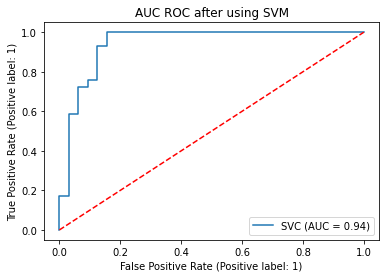

In [175]:
plot_roc_curve(svc_model, x_test, y_test)
plt.plot([0,1], [0,1], "r--")
plt.title("AUC ROC after using SVM")
plt.show()

## Using Random Forest Algorithm

In [176]:
from sklearn.ensemble import RandomForestClassifier

In [177]:
random_forest = RandomForestClassifier(random_state = 5)

In [178]:
random_forest.fit(x_train, y_train)

RandomForestClassifier(random_state=5)

In [180]:
y_pred_rf = random_forest.predict(x_test)

In [181]:
print(" Accuracy score of RF is: {} ".format( accuracy_score(y_test, y_pred_rf)))

 Accuracy score of RF is: 0.9016393442622951 


In [184]:
#Checking the reliability

from sklearn.model_selection import cross_val_score
scores_rf = cross_val_score(random_forest, x_test, y_test, cv = 10 )
print("Cross validation score using Random Forests is :", scores_rf.mean())

Cross validation score using Random Forests is : 0.8380952380952381


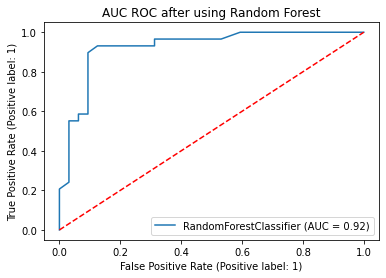

In [185]:
# There is a little underfitting happening in this model, let's try hyper-parameter tuning to solve the problem

plot_roc_curve(random_forest, x_test, y_test)
plt.plot([0,1], [0,1], "r--")
plt.title("AUC ROC after using Random Forest")
plt.show()

In [186]:
# We see an AUC value of 92%. Let's now use GridSearchCV

In [187]:
from sklearn.model_selection import GridSearchCV

In [188]:
random_forest_new = RandomForestClassifier(random_state = 5)

In [190]:
random_forest_new

RandomForestClassifier(random_state=5)

In [193]:
parameters = {'n_estimators' : [50, 100, 150, 200],
              
              'criterion': ['gini', 'entropy'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'bootstrap' : [True, False]}

random_forest_grid = GridSearchCV(random_forest_new, param_grid = parameters)

In [194]:
random_forest_grid.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=5),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [195]:
print("Best parameters are : {}".format(random_forest_grid.best_params_))

Best parameters are : {'bootstrap': True, 'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 150}


In [197]:
random_forest_new2 = RandomForestClassifier(bootstrap= True, criterion= 'gini', max_features= 'auto', n_estimators= 150, random_state = 5)

In [198]:
random_forest_new2.fit(x_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=5)

In [199]:
y_pred_rf2 = random_forest_new2.predict(x_test)

In [200]:
print("Accuracy with hyperparameter tuning is : {}".format (accuracy_score(y_test, y_pred_rf2)))

Accuracy with hyperparameter tuning is : 0.9180327868852459


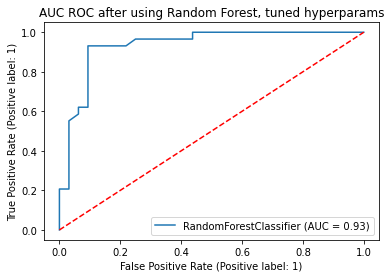

In [202]:
plot_roc_curve(random_forest_new2, x_test, y_test)
plt.plot([0,1], [0,1], "r--")
plt.title("AUC ROC after using Random Forest, tuned hyperparams")
plt.show()

## Project Conclusion